## <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
import pandas as pd
import numpy as np

## <CENTER><U> 2. READING INPUT DATA </CENTER></U>

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("Data processing/feature_caclculated.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'People_Num', 'Time', 'Travel Start Time',
       'Travel End Time', 'Lat', 'Lon', 'Alt', 'Transportation Mode',
       'Travel Count', 'Time Gap(s)', 'Distance(m)', 'Speed(m/s)',
       'Acceleration(m/s^2)', 'Total Time(s)', 'Total Distance(m)'],
      dtype='object')

In [4]:
data.dtypes

Unnamed: 0               int64
People_Num               int64
Time                    object
Travel Start Time       object
Travel End Time         object
Lat                    float64
Lon                    float64
Alt                    float64
Transportation Mode     object
Travel Count             int64
Time Gap(s)             object
Distance(m)             object
Speed(m/s)              object
Acceleration(m/s^2)     object
Total Time(s)           object
Total Distance(m)       object
dtype: object

In [5]:
display(data.head(8))

,Unnamed: 0,People_Num,Time,Travel Start Time,Travel End Time,Lat,Lon,Alt,Transportation Mode,Travel Count,Time Gap(s),Distance(m),Speed(m/s),Acceleration(m/s^2),Total Time(s),Total Distance(m)
0,0,104,2008-03-28 08:44:30,2008-03-28 08:42:00,2008-03-28 09:50:00,39.962098,116.301595,0.0,bus,1,240,1542.2920914409665,6.43,-0.01,N.A,N.A
1,1,104,2008-03-28 08:48:30,2008-03-28 08:42:00,2008-03-28 09:50:00,39.948270,116.303298,0.0,bus,1,50,143.9636385353144,2.88,0.19,N.A,N.A
2,2,104,2008-03-28 08:49:20,2008-03-28 08:42:00,2008-03-28 09:50:00,39.947045,116.303850,0.0,bus,1,58,706.3668121584448,12.18,-0.04,N.A,N.A
3,3,104,2008-03-28 08:50:18,2008-03-28 08:42:00,2008-03-28 09:50:00,39.940685,116.304043,0.0,bus,1,50,490.10067854245034,9.8,-0.02,N.A,N.A
4,4,104,2008-03-28 08:51:08,2008-03-28 08:42:00,2008-03-28 09:50:00,39.936278,116.303712,0.0,bus,1,52,452.6519866162259,8.7,-0.08,N.A,N.A
5,5,104,2008-03-28 08:52:00,2008-03-28 08:42:00,2008-03-28 09:50:00,39.932202,116.303695,0.0,bus,1,52,227.727881360944,4.38,-0.0,N.A,N.A
6,6,104,2008-03-28 08:52:52,2008-03-28 08:42:00,2008-03-28 09:50:00,39.930165,116.304010,0.0,bus,1,60,255.7972415162349,4.26,0.02,N.A,N.A
7,7,104,2008-03-28 08:53:52,2008-03-28 08:42:00,2008-03-28 09:50:00,39.927862,116.304065,0.0,bus,1,52,277.1296462365579,5.33,-0.03,N.A,N.A


## <CENTER><U>3. FEATURE EXTRACTION 

In [6]:

data_feature = pd.DataFrame(columns=['Travel Count', 'Transportation Mode', 'Max Speed(m/s)', '95% Speed(m/s)',
                                     '75% Speed(m/s)', 'Mean Speed(m/s)', 'Speed Std', 'Max Acceleration(m/s^2)',
                                     '95% Acceleration(m/s^2)', '75% Acceleration(m/s^2)',
                                     'Mean Acceleration(m/s^2)', 'Acceleration Std', 'Non 0 Mean Speed(m/s)',
                                     'Non 0 Mean Acceleration(m/s^2)', 'Total Time(s)', 'Total Distance(m)'])

### Fetaure extraction criterias for speed

In [7]:
count_speed = []

for i in range(len(data)):
    if data['Transportation Mode'][i] == 'train' or data['Transportation Mode'][i] == 'subway':
        if data['Speed(m/s)'][i] != 'N.A':
            if float(data['Speed(m/s)'][i]) > 100:
                count_speed.append(i)
    if data['Transportation Mode'][i] == 'taxi' or data['Transportation Mode'][i] == 'bus' \
            or data['Transportation Mode'][i] == 'car':
        if data['Speed(m/s)'][i] != 'N.A':
            if float(data['Speed(m/s)'][i]) > 45:
                count_speed.append(i)
    if data['Transportation Mode'][i] == 'walk':
        if data['Speed(m/s)'][i] != 'N.A':
            if float(data['Speed(m/s)'][i]) > 5:
                count_speed.append(i)
    if data['Transportation Mode'][i] == 'bike':
        if data['Speed(m/s)'][i] != 'N.A':
            if float(data['Speed(m/s)'][i]) > 10:
                count_speed.append(i)

data = data.drop(count_speed).reset_index(drop=True)

### Fetaure extraction criterias for acceleration

In [8]:
count_speed_a = []

for i in range(len(data)):
    if data['Transportation Mode'][i] == 'train' or data['Transportation Mode'][i] == 'subway':
        if data['Acceleration(m/s^2)'][i] != 'N.A':
            if float(data['Acceleration(m/s^2)'][i]) > 8:
                count_speed_a.append(i)
    if data['Transportation Mode'][i] == 'taxi' or data['Transportation Mode'][i] == 'bus' \
            or data['Transportation Mode'][i] == 'car':
        if data['Acceleration(m/s^2)'][i] != 'N.A':
            if float(data['Acceleration(m/s^2)'][i]) > 12:
                count_speed_a.append(i)
    if data['Transportation Mode'][i] == 'walk':
        if data['Acceleration(m/s^2)'][i] != 'N.A':
            if float(data['Acceleration(m/s^2)'][i]) > 3:
                count_speed_a.append(i)
    if data['Transportation Mode'][i] == 'bike':
        if data['Acceleration(m/s^2)'][i] != 'N.A':
            if float(data['Acceleration(m/s^2)'][i]) > 5:
                count_speed_a.append(i)

data = data.drop(count_speed_a).reset_index(drop=True)

In [9]:
count = 1
count_list = []
location = []

for i in range(len(data)-1):
    if data['Travel Count'][i] == data['Travel Count'][i+1]:
        count = count + 1
    else:
        count_list.append(count)
        count = 1
count_list.append(count)

for i in range(len(count_list)):
    if count_list[i] < 4:
        location.append(i+1)

data = data[-data['Travel Count'].isin(location)]
data = data.reset_index(drop=True)

In [10]:
speed = []
acceleration = []
travel_count_feature = []
mode_feature = []
speed_max_feature = []
speed_95_feature = []
speed_75_feature = []
speed_mean_feature = []
speed_std_feature = []
acceleration_max_feature = []
acceleration_95_feature = []
acceleration_75_feature = []
acceleration_mean_feature = []
acceleration_std_feature = []

total_time_feature = []
total_distance_feature = []

non_0_speed = []
non_0_speed_acceleration = []
non_0_speed_mean_feature = []
non_0_speed_acceleration_mean_feature = []

for i in range(len(data)):
    if i != len(data)-1:
        if data['Travel Count'][i] == data['Travel Count'][i+1]:
            if float(data['Speed(m/s)'][i]) != 0:
                non_0_speed.append(float(data['Speed(m/s)'][i]))
                non_0_speed_acceleration.append(data['Acceleration(m/s^2)'][i])
            speed.append(float(data['Speed(m/s)'][i]))
            acceleration.append(data['Acceleration(m/s^2)'][i])
        else:
            if 'N.A' in acceleration:
                acceleration.remove('N.A')
            acceleration = list(map(float, acceleration))
            acceleration = list(map(abs, acceleration))
            speed_np = np.array(speed)
            acceleration_np = np.array(acceleration)
            travel_count_feature.append(data['Travel Count'][i])
            mode_feature.append(data['Transportation Mode'][i])

            speed_max_feature.append(max(speed))
            speed_95_feature.append(round(np.percentile(speed_np, 95), 2))
            speed_75_feature.append(round(np.percentile(speed_np, 75), 2))
            speed_mean_feature.append(round(float(np.mean(speed_np)), 2))
            speed_std_feature.append(round(float(np.std(speed_np)), 2))

            acceleration_max_feature.append(max(acceleration))
            acceleration_95_feature.append(round(np.percentile(acceleration_np, 95), 2))
            acceleration_75_feature.append(round(np.percentile(acceleration_np, 75), 2))
            acceleration_mean_feature.append(round(float(np.mean(acceleration_np)), 2))
            acceleration_std_feature.append(round(float(np.std(acceleration_np)), 2))

            total_time_feature.append(float(data['Total Time(s)'][i]))
            total_distance_feature.append(round(float(data['Total Distance(m)'][i]), 2))

            speed = []
            acceleration = []
            if 'N.A' in non_0_speed_acceleration:
                non_0_speed_acceleration.remove('N.A')
            non_0_speed_acceleration = list(map(float, non_0_speed_acceleration))
            non_0_speed_acceleration = list(map(abs, non_0_speed_acceleration))
            non_0_speed_np = np.array(non_0_speed)
            non_0_acceleration_np = np.array(non_0_speed_acceleration)
            non_0_speed_mean_feature.append(round(float(np.mean(non_0_speed_np)), 2))
            non_0_speed_acceleration_mean_feature.append(round(float(np.mean(non_0_acceleration_np)), 2))

            non_0_speed = []
            non_0_speed_acceleration = []

    else:
        if 'N.A' in acceleration:
            acceleration.remove('N.A')
        acceleration = list(map(float, acceleration))
        acceleration = list(map(abs, acceleration))
        speed_np = np.array(speed)
        acceleration_np = np.array(acceleration)
        travel_count_feature.append(data['Travel Count'][i])
        mode_feature.append(data['Transportation Mode'][i])

        speed_max_feature.append(max(speed))
        speed_95_feature.append(round(np.percentile(speed_np, 95), 2))
        speed_75_feature.append(round(np.percentile(speed_np, 75), 2))
        speed_mean_feature.append(round(float(np.mean(speed_np)), 2))
        speed_std_feature.append(round(float(np.std(speed_np)), 2))

        acceleration_max_feature.append(max(acceleration))
        acceleration_95_feature.append(round(np.percentile(acceleration_np, 95), 2))
        acceleration_75_feature.append(round(np.percentile(acceleration_np, 75), 2))
        acceleration_mean_feature.append(round(float(np.mean(acceleration_np)), 2))
        acceleration_std_feature.append(round(float(np.std(acceleration_np)), 2))

        total_time_feature.append(float(data['Total Time(s)'][i]))
        total_distance_feature.append(round(float(data['Total Distance(m)'][i]), 2))

        if 'N.A' in non_0_speed_acceleration:
            non_0_speed_acceleration.remove('N.A')
        non_0_speed_acceleration = list(map(float, non_0_speed_acceleration))
        non_0_speed_acceleration = list(map(abs, non_0_speed_acceleration))
        non_0_speed_np = np.array(non_0_speed)
        non_0_acceleration_np = np.array(non_0_speed_acceleration)
        non_0_speed_mean_feature.append(round(float(np.mean(non_0_speed_np)), 2))
        non_0_speed_acceleration_mean_feature.append(round(float(np.mean(non_0_acceleration_np)), 2))

In [11]:
data_feature['Travel Count'] = travel_count_feature
data_feature['Transportation Mode'] = mode_feature
data_feature['Max Speed(m/s)'] = speed_max_feature
data_feature['95% Speed(m/s)'] = speed_95_feature
data_feature['75% Speed(m/s)'] = speed_75_feature
data_feature['Mean Speed(m/s)'] = speed_mean_feature
data_feature['Speed Std'] = speed_std_feature
data_feature['Max Acceleration(m/s^2)'] = acceleration_max_feature
data_feature['95% Acceleration(m/s^2)'] = acceleration_95_feature
data_feature['75% Acceleration(m/s^2)'] = acceleration_75_feature
data_feature['Mean Acceleration(m/s^2)'] = acceleration_mean_feature
data_feature['Acceleration Std'] = acceleration_std_feature
data_feature['Non 0 Mean Speed(m/s)'] = non_0_speed_mean_feature
data_feature['Non 0 Mean Acceleration(m/s^2)'] = non_0_speed_acceleration_mean_feature
data_feature['Total Time(s)'] = total_time_feature
data_feature['Total Distance(m)'] = total_distance_feature

In [12]:
data_feature.to_excel("Data processing/feature_extracted.xlsx", index=0)

In [6]:
display(data.head(8))

,Unnamed: 0,People_Num,Time,Travel Start Time,Travel End Time,Lat,Lon,Alt,Transportation Mode,Travel Count,Time Gap(s),Distance(m),Speed(m/s),Acceleration(m/s^2),Total Time(s),Total Distance(m)
0,0,104,2008-03-28 08:44:30,2008-03-28 08:42:00,2008-03-28 09:50:00,39.962098,116.301595,0.0,bus,1,240,1542.2920914409665,6.43,-0.01,N.A,N.A
1,1,104,2008-03-28 08:48:30,2008-03-28 08:42:00,2008-03-28 09:50:00,39.948270,116.303298,0.0,bus,1,50,143.9636385353144,2.88,0.19,N.A,N.A
2,2,104,2008-03-28 08:49:20,2008-03-28 08:42:00,2008-03-28 09:50:00,39.947045,116.303850,0.0,bus,1,58,706.3668121584448,12.18,-0.04,N.A,N.A
3,3,104,2008-03-28 08:50:18,2008-03-28 08:42:00,2008-03-28 09:50:00,39.940685,116.304043,0.0,bus,1,50,490.10067854245034,9.8,-0.02,N.A,N.A
4,4,104,2008-03-28 08:51:08,2008-03-28 08:42:00,2008-03-28 09:50:00,39.936278,116.303712,0.0,bus,1,52,452.6519866162259,8.7,-0.08,N.A,N.A
5,5,104,2008-03-28 08:52:00,2008-03-28 08:42:00,2008-03-28 09:50:00,39.932202,116.303695,0.0,bus,1,52,227.727881360944,4.38,-0.0,N.A,N.A
6,6,104,2008-03-28 08:52:52,2008-03-28 08:42:00,2008-03-28 09:50:00,39.930165,116.304010,0.0,bus,1,60,255.7972415162349,4.26,0.02,N.A,N.A
7,7,104,2008-03-28 08:53:52,2008-03-28 08:42:00,2008-03-28 09:50:00,39.927862,116.304065,0.0,bus,1,52,277.1296462365579,5.33,-0.03,N.A,N.A


In [10]:
data.columns

Index(['Unnamed: 0', 'People_Num', 'Time', 'Travel Start Time',
       'Travel End Time', 'Lat', 'Lon', 'Alt', 'Transportation Mode',
       'Travel Count', 'Time Gap(s)', 'Distance(m)', 'Speed(m/s)',
       'Acceleration(m/s^2)', 'Total Time(s)', 'Total Distance(m)'],
      dtype='object')

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
data.dtypes

Unnamed: 0               int64
People_Num               int64
Time                    object
Travel Start Time       object
Travel End Time         object
Lat                    float64
Lon                    float64
Alt                    float64
Transportation Mode     object
Travel Count             int64
Time Gap(s)             object
Distance(m)             object
Speed(m/s)              object
Acceleration(m/s^2)     object
Total Time(s)           object
Total Distance(m)       object
dtype: object

In [20]:
data["Distance(m)"] = pd.to_numeric(data["Distance(m)"], errors='coerce')
data["Speed(m/s)"] = pd.to_numeric(data["Speed(m/s)"], errors='coerce')
data["Acceleration(m/s^2)"] = pd.to_numeric(data["Acceleration(m/s^2)"], errors='coerce')
data["Time Gap(s)"] = pd.to_numeric(data["Time Gap(s)"], errors='coerce')

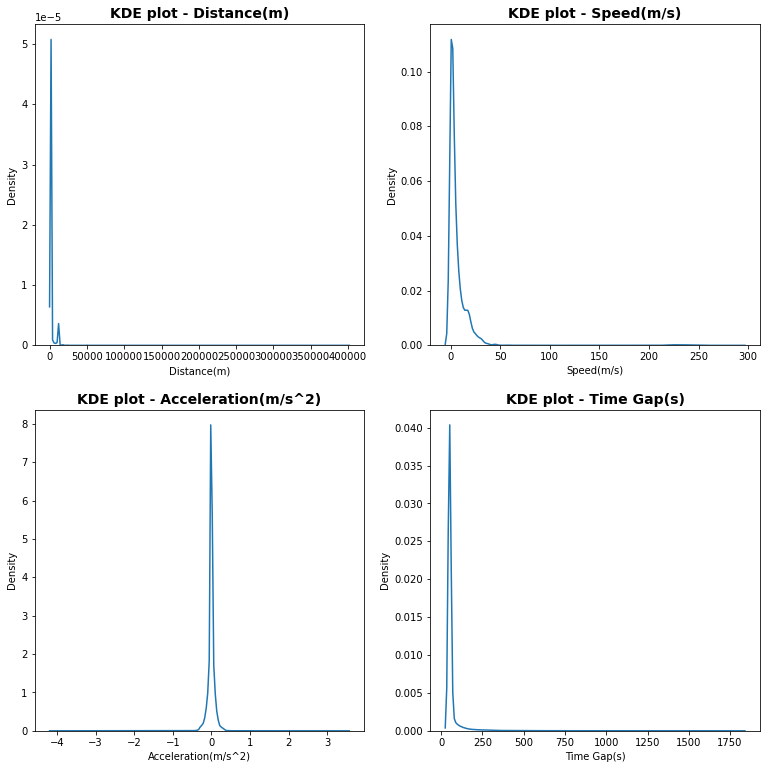

In [21]:
fig, axs = plt.subplots(2, 2,figsize=(13,13))
sns.kdeplot(data=data,x="Distance(m)",ax = axs[0,0])
sns.kdeplot(data=data,x="Speed(m/s)",ax = axs[0,1])
sns.kdeplot(data=data,x="Acceleration(m/s^2)",ax = axs[1,0])
sns.kdeplot(data=data,x="Time Gap(s)",ax = axs[1,1])
axs[0,0].set_title("KDE plot - Distance(m)",fontweight='bold',fontsize=14)
axs[0,1].set_title("KDE plot - Speed(m/s)",fontweight='bold',fontsize=14)
axs[1,0].set_title("KDE plot - Acceleration(m/s^2)",fontweight='bold',fontsize=14)
axs[1,1].set_title("KDE plot - Time Gap(s)",fontweight='bold',fontsize=14)
plt.show()